# Minimum Sample Size
This is a breakdown of the calculator found at this url: http://www.evanmiller.org/ab-testing/sample-size.html

## Definitions

* Baseline conversion rate: shown as bsc below; equal to $p$ in the context of a binomial distribution and $p$ is the probability of success
* Minimum Detectable Effect: shown as mde below; sometimes referred to as the practical significance level (Udacity, Google)
* Statistical power 1−$\beta$ or sensitivity: typically 80% is used for most analyses; probability of rejecting the null hypothesis when the null hypothesis is indeed false
* Significance level $\alpha$: typically 5%; probabilty of rejecting the null hypothesis when the null hypothesis is true
* $\beta$: probability of accepting the null hypothesis when the null hypothesis is indeed false

In [1]:
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('ggplot')

In [2]:
bsc = 0.10
mde = 0.05

# sig_level is typically denoted as alpha and power is sensitivity or (1-beta)
sig_level = 0.05
beta = 0.2

In [3]:
n=599
bsc_binom = scs.binom(n, p=bsc)
mde_binom = scs.binom(n, p=bsc+mde)

<BarContainer object of 600 artists>

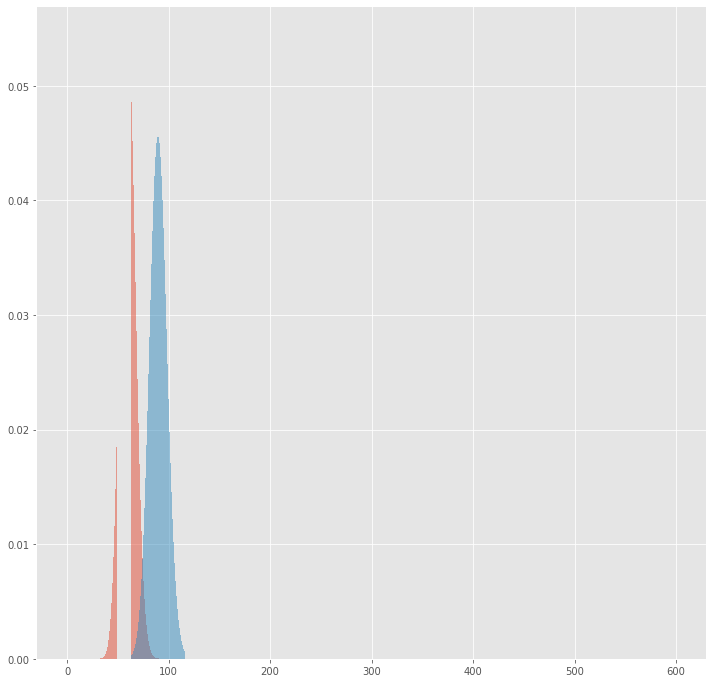

In [4]:
fig, ax = plt.subplots(figsize=(12,12))
x = np.linspace(0,n,n+1)
ax.bar(x, bsc_binom.pmf(x), alpha=0.5)
ax.bar(x, mde_binom.pmf(x), alpha=0.5)

## Approximate as a normal distribution

In [5]:
bsc_binom.var()

53.910000000000004

In [6]:
bsc_binom.mean()

59.900000000000006

In [7]:
bsc_norm = scs.norm(bsc_binom.mean(), np.sqrt(bsc_binom.var()))
mde_norm = scs.norm(mde_binom.mean(), np.sqrt(mde_binom.var()))

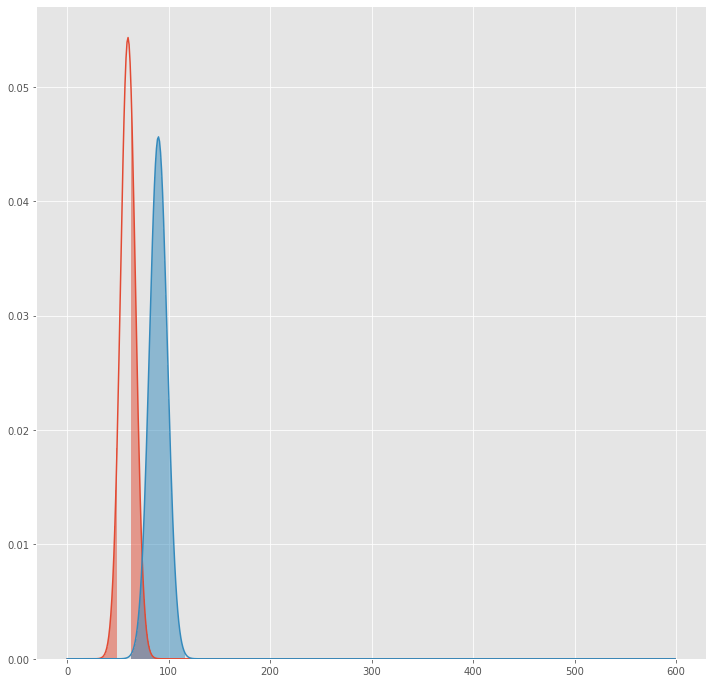

In [8]:
fig, ax = plt.subplots(figsize=(12,12))
x = np.linspace(0,n,n+1)
ax.bar(x, bsc_binom.pmf(x), alpha=0.5)
ax.bar(x, mde_binom.pmf(x), alpha=0.5)
ax.plot(x, bsc_norm.pdf(x))
ax.plot(x, mde_norm.pdf(x))

## Show the significane level on the plot
For a two-tailed test, a significance level of 5% should be divided by 2.

In [9]:
aa = bsc_norm.ppf(sig_level / 2)
ab = bsc_norm.ppf(1 - (sig_level / 2))
aa, ab

(45.50927225524643, 74.29072774475358)

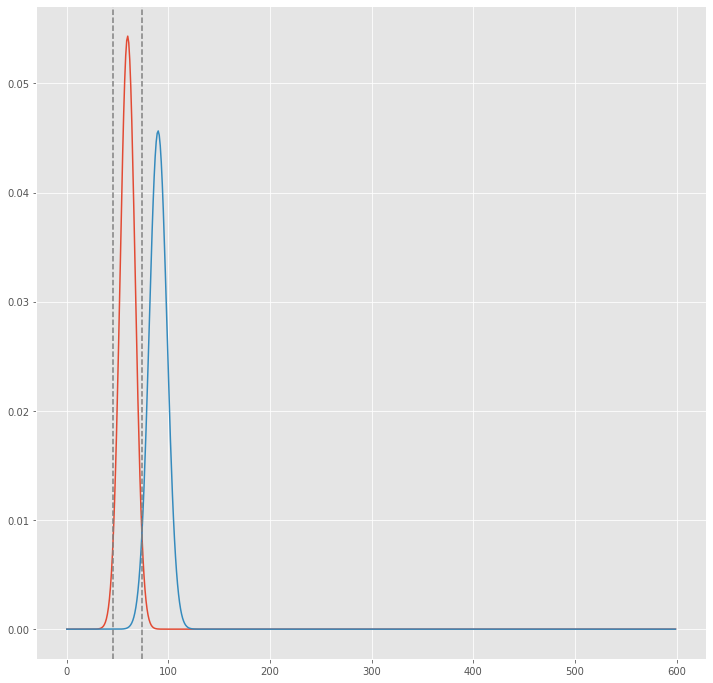

In [10]:
fig, ax = plt.subplots(figsize=(12,12))
x = np.linspace(0,n,n+1)

ax.plot(x, bsc_norm.pdf(x))
ax.plot(x, mde_norm.pdf(x))
ax.axvline(x=aa, c='gray', linestyle='--')
ax.axvline(x=ab, c='gray', linestyle='--')

In [11]:
curr_power = 1 - mde_norm.cdf(ab)

In [12]:
curr_power

0.9624958087559896

In [13]:
n = 1030
bsc = 0.20
mde = 0.05

# sig_level is typically denoted as alpha and power is sensitivity or (1-beta)
sig_level = 0.05
beta = 0.2

In [14]:
N_control = n
N_exp = n
X_control = bsc * N_control
X_exp = (bsc + mde) * N_exp

In [15]:
p_hat_control = X_control / N_control
p_hat_exp = X_exp / N_exp
p_hat_control, p_hat_exp

(0.2, 0.25)

In [16]:
p_hat_pool = (X_control + X_exp) / (N_control + N_exp)
p_hat_pool

0.225

In [17]:
SE_pool = np.sqrt(p_hat_pool * (1 - p_hat_pool) * (1 / N_control + 1 / N_exp))
SE_pool

0.018400875876156242

In [18]:
d_hat = p_hat_exp - p_hat_control
d_hat

0.04999999999999999

In [19]:
d_norm = scs.norm(0, SE_pool)

In [20]:
d_hat_norm = scs.norm(d_hat, SE_pool)

In [21]:
da = d_norm.ppf(sig_level/2)
db = d_norm.ppf(1 - sig_level/2)
da, db

(-0.03606505400125815, 0.036065054001258146)

In [22]:
1.96 * SE_pool

0.03606571671726623

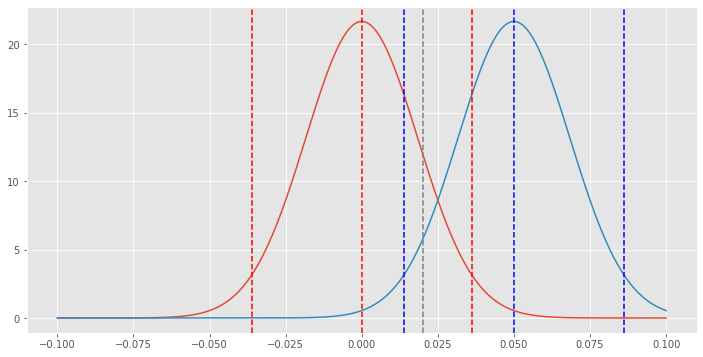

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(-0.1, .1,1000)

ax.plot(x, d_norm.pdf(x))
ax.plot(x, d_hat_norm.pdf(x))

ax.axvline(x=0, c='red', linestyle='--')
ax.axvline(da, c='red', linestyle='--')
ax.axvline(db, c='red', linestyle='--')
ax.axvline(x=d_hat, c='blue', linestyle='--')
ax.axvline(x=d_hat+da, c='blue', linestyle='--')
ax.axvline(x=d_hat+db, c='blue', linestyle='--')

ax.axvline(x=0.02, c='gray', linestyle='--')

In [24]:
curr_power = 1 - d_hat_norm.cdf(mde)
curr_power

0.49999999999999967

In [25]:
# sig_level is typically denoted as alpha and power is sensitivity or (1-beta)
sig_level = 0.05
beta = 0.2
mde = 0.05

In [26]:
N_control = 686
N_exp = N_control

In [27]:
p_hat_control = 0.1
p_hat_exp = p_hat_control + mde
p_hat_control, p_hat_exp

(0.1, 0.15000000000000002)

In [28]:
X_control = p_hat_control * N_control
X_exp = p_hat_exp * N_exp
X_control, X_exp

(68.60000000000001, 102.90000000000002)

In [29]:
p_hat_pool = (X_control + X_exp) / (N_control + N_exp)
p_hat_pool

0.12500000000000003

In [30]:
SE_pool = np.sqrt(p_hat_pool * (1 - p_hat_pool) * (1 / N_control + 1 / N_exp))
SE_pool

0.01785714285714286

In [31]:
d_hat = p_hat_exp - p_hat_control
d_hat

0.05000000000000002

In [32]:
d_norm = scs.norm(0, SE_pool)

In [33]:
d_hat_norm = scs.norm(d_hat, SE_pool)

In [34]:
da = d_norm.ppf(sig_level/2)
db = d_norm.ppf(1 - sig_level/2)
da, db

(-0.03499935686678669, 0.034999356866786686)

In [35]:
1.96 * SE_pool

0.035

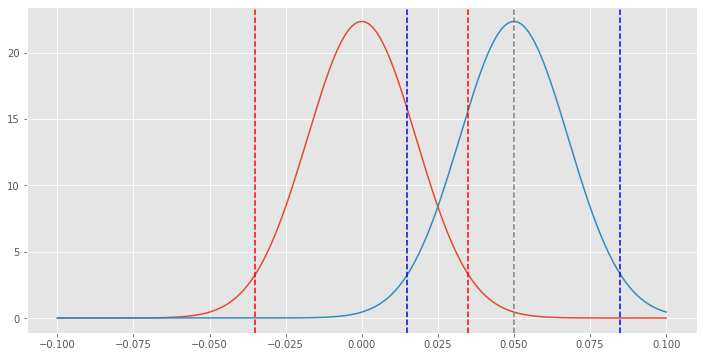

In [36]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(-.1, .1,1000)

ax.plot(x, d_norm.pdf(x))
ax.plot(x, d_hat_norm.pdf(x))
# ax.axvline(x=0, c='red', linestyle='--')
ax.axvline(da, c='red', linestyle='--')
ax.axvline(db, c='red', linestyle='--')
# ax.axvline(x=d_hat, c='blue', linestyle='--')
ax.axvline(x=d_hat+da, c='blue', linestyle='--')
ax.axvline(x=d_hat+db, c='blue', linestyle='--')

ax.axvline(x=mde, c='gray', linestyle='--')

In [37]:
power_from_null = 1 - d_hat_norm.cdf(db)
power_from_null

0.7995559032981123

In [38]:
p_hat_pool

0.12500000000000003

In [39]:
mde

0.05

## Equation for minimum sample size
From a Stanford lecture on sample sizes:
http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf

$$ n = \frac{2(\bar{p})(1-\bar{p})(Z_\beta + Z_{s\alpha/2})^2}{(p_1 - p_2)^2} $$

In [40]:
2 * p_hat_pool * (1 - p_hat_pool) * (0.84 + 1.96)**2 / mde**2

686.0

In [41]:
def min_sample_size(prob_control, effect_size, power=0.8, sig_level=0.05):
    """Returns the minimum sample size to set up a split test
    
    Arguments:
        prob_control (float): probability of success for control, sometimes referred to as baseline conversion rate
        effect_size (float): minimum change in measurement between control group and test group if alternative hypothesis is true
        power (float): probability of rejecting the null hypothesis when the null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha, typically 0.05
        
    Returns:
        min_N: minimum sample size (float)
    """
    # standard normal distribution to determine z-values
    standard_norm = scs.norm(0, 1)
    
    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)
    
    pooled_prob = prob_control + effect_size / 2
    
    min_N = 2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / effect_size**2
    
    return min_N

In [42]:
min_sample_size(.1, .05)

686.7769767555451